# Convolution

[Mauricio de Oliveira](http://control.ucsd.edu/mauricio)

*September 2019*

In this notebook you will work with the impulse response of linear time-invariant systems.

## Load some packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, fixed
import ipywidgets as widgets

## Convolution

Start by constructing the signal
$$
g[n] = \alpha^n, \quad n \geq 0, \quad \alpha = -0.8
$$

In [2]:
alpha = -0.8
def gg(n):
    return 0. if n < 0 else alpha ** n
G = np.vectorize(gg)

In [3]:
N=10
alpha = -0.8

n = np.arange(-N,N+1)
g = G(n)

Plot the signal

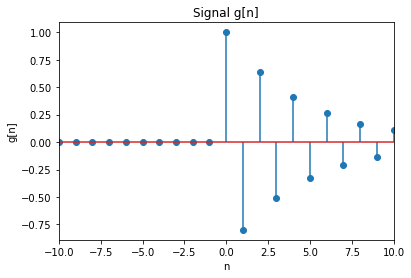

In [4]:
plt.stem(n, g, use_line_collection=True)
plt.title('Signal g[n]');
plt.xlabel('n');
plt.ylabel('g[n]');
plt.xlim(-N,N);

Now consider the step
$$
u[n] = 1, \quad n \geq 0
$$

In [5]:
def ss(n):
    return 0. if n < 0 else 1.
step = np.vectorize(ss)

u = step(n)

and its plot

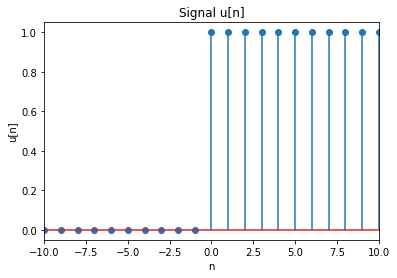

In [6]:
plt.stem(n, u, use_line_collection=True)
plt.title('Signal u[n]');
plt.xlabel('n');
plt.ylabel('u[n]');
plt.xlim(-N,N);

Their convolution is the signal
$$
y[n] = \sum_{k = -\infty}^{\infty} g[k] \, u[n - k] = \sum_{k = -\infty}^{\infty} g[n - k] \, u[k]
$$
Note that because both $u$ and $g$ are zero for $n < 0$ that the above sums can be simplified to
$$
y[n] = \sum_{k = 0}^{n} g[k] \, u[n - k] = \sum_{k = 0}^{n} g[n - k] \, u[k]
$$

Because we already have a vector $n$, it is easier to program the function
$$
y[k] = \sum_{n = 0}^{k} g[n] \, u[k - n] = \sum_{n = 0}^{k} g[k - n] \, u[n]
$$

In [7]:
def conv(g,u):
    return np.array([(g(n)*u(k-n)).sum() for k in n])

y = conv(G, step)

which we can plot

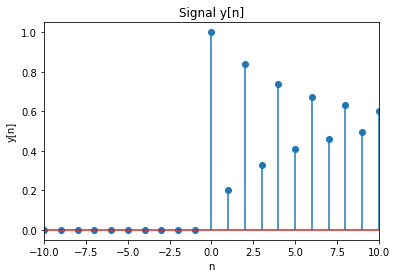

In [8]:
plt.stem(n, y, use_line_collection=True)
plt.title('Signal y[n]');
plt.xlabel('n');
plt.ylabel('y[n]');
plt.xlim(-N,N);

## Interactive convolution

The following function calculates and plots
$$
g[n], \quad u[k - n], \quad \text{and the product} \quad g[n] \, u[k - n]
$$
for each given $k$:

In [9]:
def convk(g, u, k):
    fig, axs = plt.subplots(4, sharex=True, figsize=(10,10), gridspec_kw={'hspace': .3})
    axs[0].stem(n, g(n), use_line_collection=True)
    axs[0].set_ylabel('g[k]')
    
    axs[1].stem(n, u(k-n), use_line_collection=True)
    axs[1].set_ylabel('u[n-k]')
    
    axs[2].stem(n, g(n)*u(k-n), use_line_collection=True)
    axs[2].set_ylabel('g[k] u[n-k]')
    
    axs[2].set_xlim(-N,N);
    axs[2].set_ylim(-1.1,1.1);
    
    y = conv(G, step)
    axs[3].stem(n, y, use_line_collection=True)
    markerline, stemlines, baseline = axs[3].stem([k], [y[k+N]], 'r', markerfmt='ro', use_line_collection=True)
    plt.setp(stemlines, 'linewidth', 4)
    plt.setp(markerline, 'markersize', 12)
    axs[3].set_ylabel('g[k] * u[k]')
    
    axs[0].set_title('y[{}] = {:.2f}'.format(k, np.sum(g(n)*u(k-n))))
    plt.show()

Its sum is the value of $y[k]$ at time $k$:

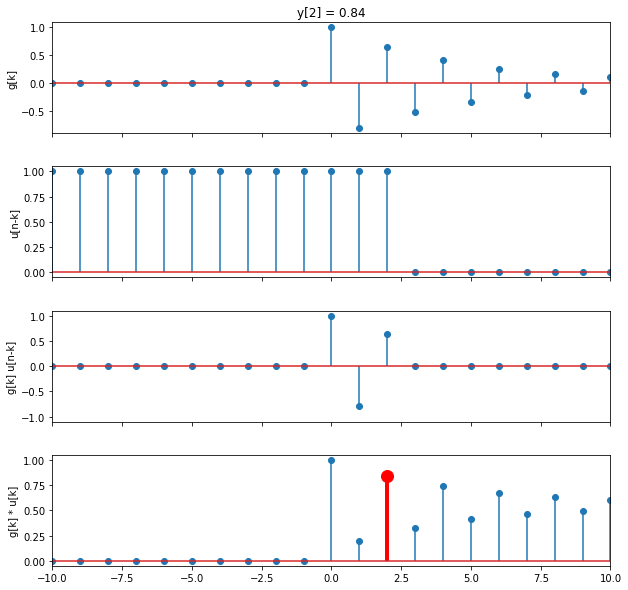

In [10]:
k = 2
convk(G, step, k)

We can do it interactively:

In [11]:
interact(convk, g=fixed(G), u=fixed(step), k = widgets.IntSlider(min=-10, max=10, step=1, value=0))

<function __main__.convk>